In [1]:
import torch
from torch.distributions import Normal
import matplotlib.pyplot as plt
import numpy as np
import unittest

In [15]:
from math import gamma
# Util functions

def gaussian_distribution_density_data(mu, sigma):
    """
        Given a mu and a sigma, this function returns a tuple representing the X and Y of the PDF

        params: mu, sigma <numbers>
        return: X, Y of the normal distribution()
    """
    data = torch.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    gaussian_distribution = (1/(sigma * torch.sqrt(torch.tensor(2) * torch.pi))) * torch.exp(-0.5 * ((data - mu) / sigma)**2)
    return data, gaussian_distribution

def plot(X, mu1, sigma1, mu2, sigma2, title=''):
    # a) Scatter Plot with histograms
    # Histograms
    plt.hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
    # Scatter
    plt.scatter(X,torch.zeros(len(X)))
    # Density
    x1, gaussian_density_1 = gaussian_distribution_density_data(mu1, sigma1)
    x2, gaussian_density_2 = gaussian_distribution_density_data(mu2, sigma2)
    plt.plot(x1, gaussian_density_1, label=f'Gaussian (mu={mu1}, sigma={sigma1})', color='red')
    plt.plot(x2, gaussian_density_2, label=f'Gaussian (mu={mu2}, sigma={sigma2})', color='blue')
    if len(title):
        plt.title(title)
    plt.legend()
    plt.show()

# Trabajo Práctico 0: Algoritmo de Maximización de la Esperanza

X =  tensor([15.8755,  8.4614, 14.1221,  9.9440, 17.0745, 10.4820,  8.2918,  4.5356,
         8.7539, 13.6831, 12.5046,  1.8243, 13.0899,  8.4385, 12.4008,  8.7898,
        10.2070,  2.5777, 13.3867,  5.8187, 23.7228, 29.8038, 29.9071, 33.2822,
        32.6970, 28.3874, 30.1834, 30.6378, 31.6908, 27.7129, 27.5442, 28.2834,
        33.0324, 36.7076, 25.5658, 31.8329, 29.2556, 31.4861, 30.2685, 29.0270])
tensor([-4.4000e+00, -4.3712e+00, -4.3423e+00, -4.3135e+00, -4.2847e+00,
        -4.2559e+00, -4.2270e+00, -4.1982e+00, -4.1694e+00, -4.1405e+00,
        -4.1117e+00, -4.0829e+00, -4.0541e+00, -4.0252e+00, -3.9964e+00,
        -3.9676e+00, -3.9387e+00, -3.9099e+00, -3.8811e+00, -3.8523e+00,
        -3.8234e+00, -3.7946e+00, -3.7658e+00, -3.7369e+00, -3.7081e+00,
        -3.6793e+00, -3.6505e+00, -3.6216e+00, -3.5928e+00, -3.5640e+00,
        -3.5351e+00, -3.5063e+00, -3.4775e+00, -3.4486e+00, -3.4198e+00,
        -3.3910e+00, -3.3622e+00, -3.3333e+00, -3.3045e+00, -3.2757e+00,
        -3

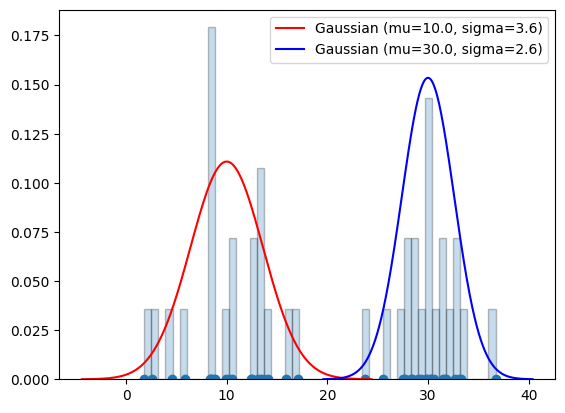

In [16]:
n = 20
mu1 = 10.0
sigma1 = 3.6
mu2 = 30.0
sigma2 = 2.6

# 1)
# Generates data that follows two 2gaussian distributions based on a set of parameters.
def generate_data(n, mu1, sigma1, mu2, sigma2):

  # Generate distributions
  normal_dist1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))
  normal_dist2 = torch.distributions.Normal(torch.tensor([mu2]), torch.tensor([sigma2]))

  # Take a sample from each dist
  gaussian_sample1 = normal_dist1.sample((n,1)).squeeze()
  gaussian_sample2 = normal_dist2.sample((n,1)).squeeze()

  # Concatenate the 2 samples
  X =  torch.cat((gaussian_sample1, gaussian_sample2))
  return X

X = generate_data(n, mu1, sigma1, mu2, sigma2)
print('X = ', X)

plot(X, mu1, sigma1, mu2, sigma2)



In [4]:
# 2)
def init_random_parameters(k=2, range=50):
  """
      Generates randombly mu and sigma parameters
      params: k, range
      return: A Kx2 matrix where colum 0 corresponds to mu and column 1 to sigma
  """
  return torch.rand((k, 2))*range

P = init_random_parameters()
print('P = ', P)

P =  tensor([[17.5095, 48.4714],
        [27.3914, 22.5637]])


In [5]:
# 3)
def calculate_log_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
  # Nota: tal vez deberíamos poner en el latex el proceso desde la función de likelihood sin log hasta esta versión
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)

likelihood_test = calculate_log_likelihood_gaussian_observation(X[0], mu1, sigma1)
print('likelihood_test = ', likelihood_test)

class LikelihoodGuassianUnitTest(unittest.TestCase):

    def test_likelihood_lower_real(self):
      test_data = torch.distributions.Normal(torch.tensor([4.0]), torch.tensor([8.0]))
      test_gaussian_sample = torch.tensor(test_data.sample((30,1)).squeeze())

      real_lgo = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 4.0, 8.0)
      false_lgo = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 40.0, 7.0)
      self.assertTrue(abs(real_lgo) < abs(false_lgo))

    def test_likelihood_value(self):
      test_gaussian_sample = torch.tensor([0.34, 0.45, 0.78])
      likelihood = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 4.0, 8.0)
      self.assertAlmostEquals(float(likelihood), -3.2824, 3)

unittest.main(argv=[''], verbosity=2, exit=False)

test_likelihood_lower_real (__main__.LikelihoodGuassianUnitTest) ... <ipython-input-5-e0f985a1e2ca>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_gaussian_sample = torch.tensor(test_data.sample((30,1)).squeeze())
ok
test_likelihood_value (__main__.LikelihoodGuassianUnitTest) ... <ipython-input-5-e0f985a1e2ca>:22: DeprecationWarning: Please use assertAlmostEqual instead.
  self.assertAlmostEquals(float(likelihood), -3.2824, 3)
ok

----------------------------------------------------------------------
Ran 2 tests in 0.015s

OK


likelihood_test =  tensor(-2.2829)


In [6]:
# 4)
def calculate_membership_dataset(X_dataset, Parameters_matrix, k=2):
  N = len(X_dataset)
  #print(N)
  M = torch.zeros(N, k)

  # for each element in X, calculate its likelyhood with each set of parameters from the Parameter Matrix and store the maximum
  for x in range(N):
    # set max likelyhood initially as a very low number (Me suena que esto también podría ponerse de una mejor forma)
    x_max_likelyhood = -999999999
    k_membership = 0
    # iterate over the parameter sets to find which set achieves max likelihood over x
    for k_index, parameters in enumerate(Parameters_matrix):
      #print('Debug: x = ', X_dataset[x], 'params = ', parameters[0], parameters[1])
      x_likelyhood = calculate_log_likelihood_gaussian_observation(X_dataset[x], parameters[0], parameters[1])
      #print('Debug: x_likelyhood = ', x_likelyhood)
      if x_likelyhood > x_max_likelyhood:
        x_max_likelyhood = x_likelyhood
        #print('Debug: max likelyhood = ', x_max_likelyhood)
        k_membership = k_index
    M[x][k_membership] = 1

  return M

M = calculate_membership_dataset(X, P)
print('M = ', M)

M =  tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])


<ipython-input-5-e0f985a1e2ca>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


In [7]:
#5)

def recalculate_parameters(X_dataset, Membership_data):
    # TODO: Can we improve this to use torch?
    membership_k1 = Membership_data[:,0]
    membership_k2 = Membership_data[:,1]
    k1_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k1[index] == 1])
    k2_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k2[index] == 1])
    mu_1 = torch.mean(k1_tentative_values)
    mu_2 = torch.mean(k2_tentative_values)
    sigma_1 = torch.std(k1_tentative_values)
    sigma_2 = torch.std(k2_tentative_values)
    return torch.tensor([[mu_1, sigma_1],[mu_2, sigma_2]])

print('Real parameters k1=[{},{}], k2=[{},{}] '.format(mu1, sigma1, mu2, sigma2))
print('Old P parameters: ', P)
P = recalculate_parameters(X, M)
print('New P parameters: ', P)

Real parameters k1=[10.0,3.6], k2=[30.0,2.6] 
Old P parameters:  tensor([[17.5095, 48.4714],
        [27.3914, 22.5637]])
New P parameters:  tensor([[    nan,     nan],
        [19.7423, 12.0739]])


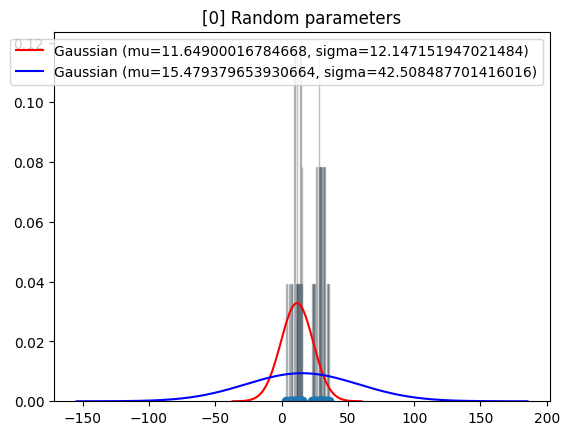

<ipython-input-5-e0f985a1e2ca>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


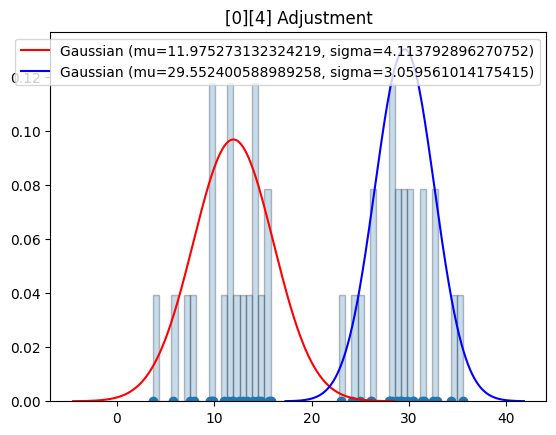

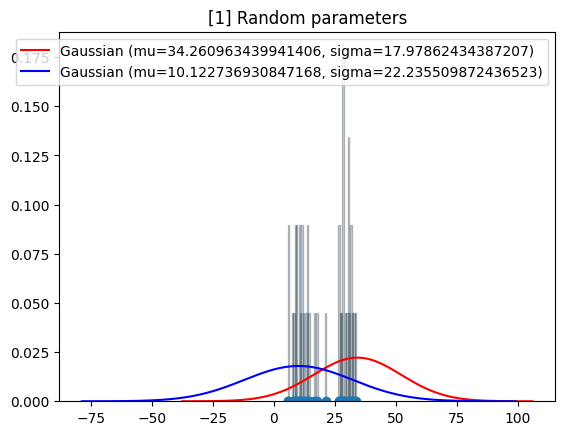

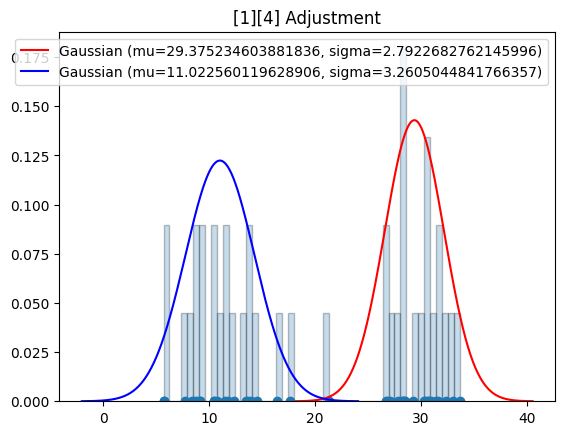

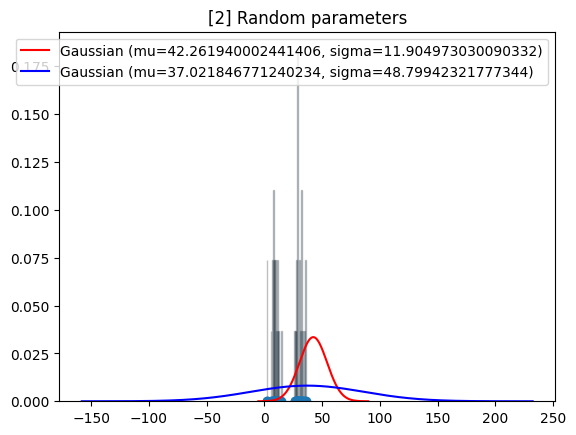

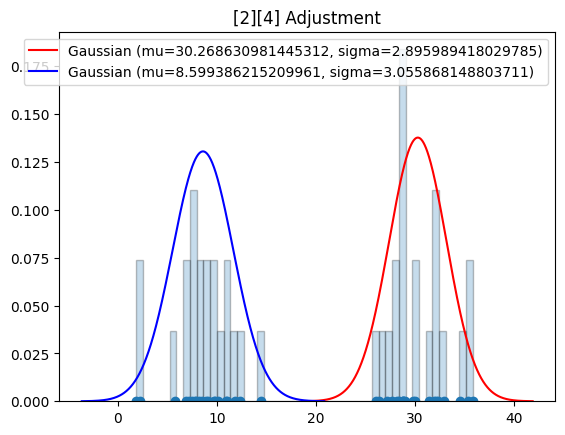

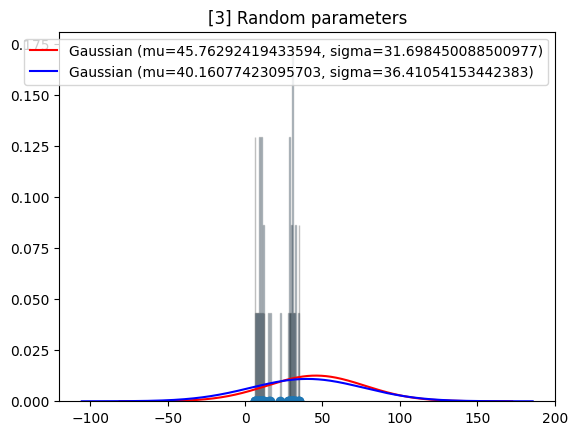

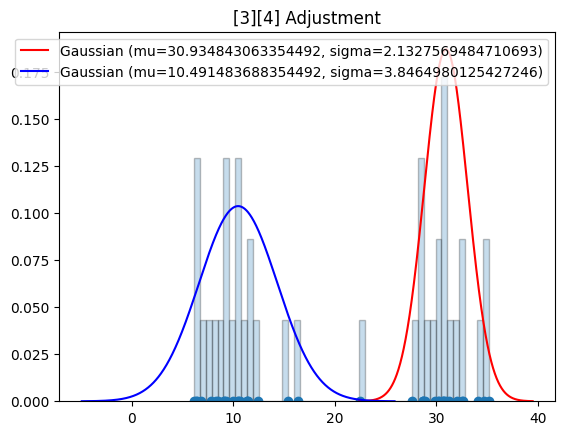

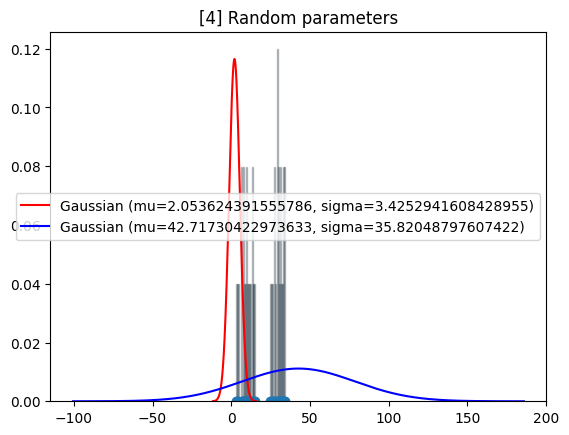

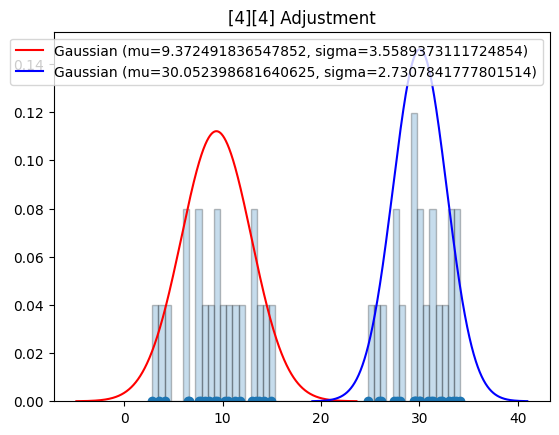

In [8]:
i_max = 5
i_adj_max = 5

mu1 = 10.0
sigma1 = 3.6
mu2 = 30.0
sigma2 = 2.6

for i in range(i_max):
    X = generate_data(n, mu1, sigma1, mu2, sigma2)
    P = init_random_parameters()
    plot(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}] Random parameters'.format(i))

    for a in range(i_adj_max):
        M = calculate_membership_dataset(X, P)

        #print('[', i,'] Old P parameters: ', P)
        P = recalculate_parameters(X, M)
        #print('[', i,'] New P parameters: ', P, '\n')
    plot(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}][{}] Adjustment'.format(i, a))

In [9]:
# 7)
def random_parameters_heuristic(X):
    mu = torch.mean(X, dim=0)
    sigma = torch.std(X, dim=0)
    mu_below = mu - sigma
    mu_above = mu + sigma
    mu1 = (mu - mu_below) * torch.rand(1) + mu_below
    sigma1 = (sigma / 2 - sigma / 4) * torch.rand(1) + sigma / 4
    mu2 = (mu_above - mu) * torch.rand(1) + mu
    sigma2 = (sigma / 2 - sigma / 4) * torch.rand(1) + sigma / 4
    return torch.tensor([[mu1, sigma1], [mu2, sigma2]])



PI = random_parameters_heuristic(X)
print(PI)

tensor([[10.1986,  5.0017],
        [25.2864,  4.6075]])


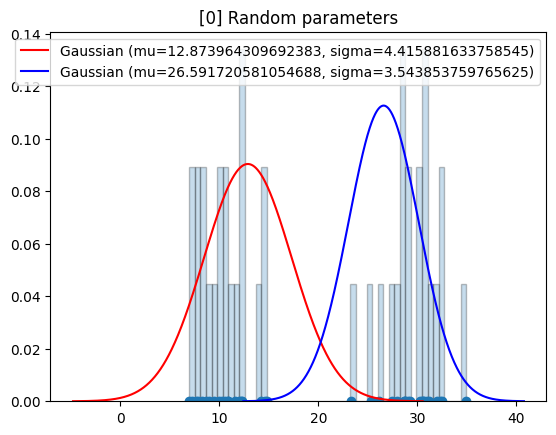

<ipython-input-5-e0f985a1e2ca>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


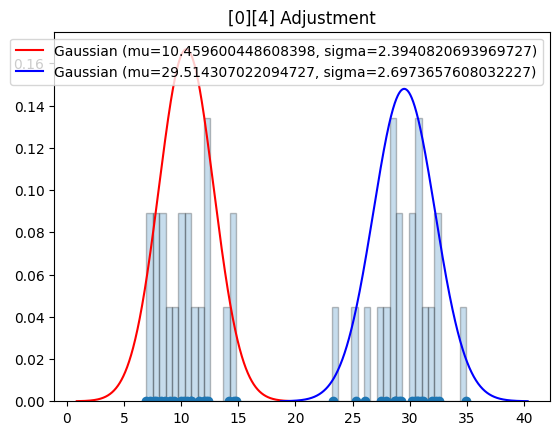

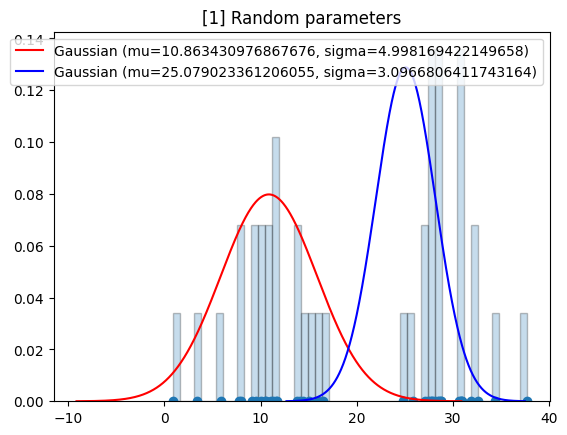

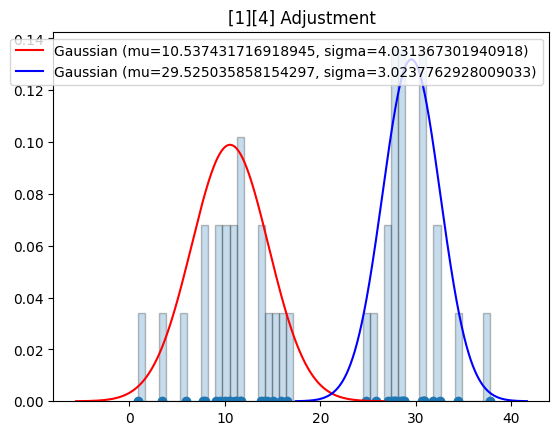

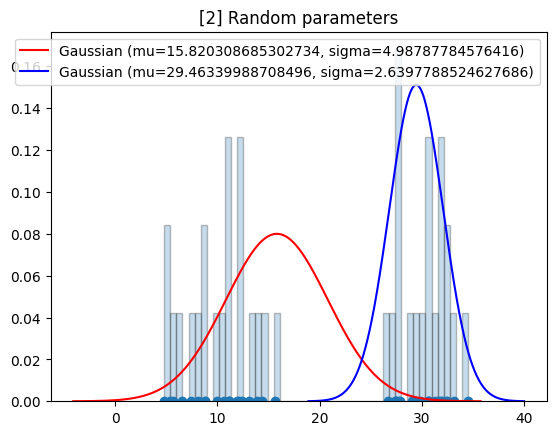

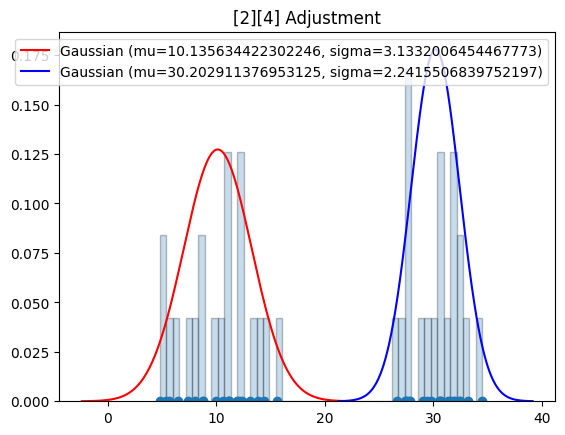

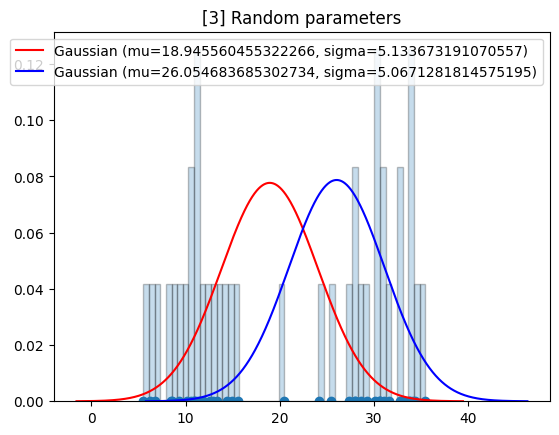

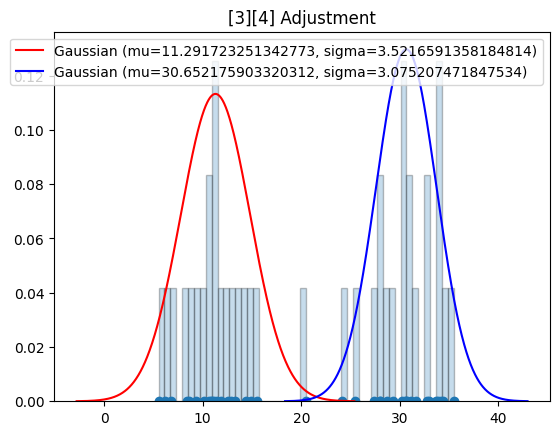

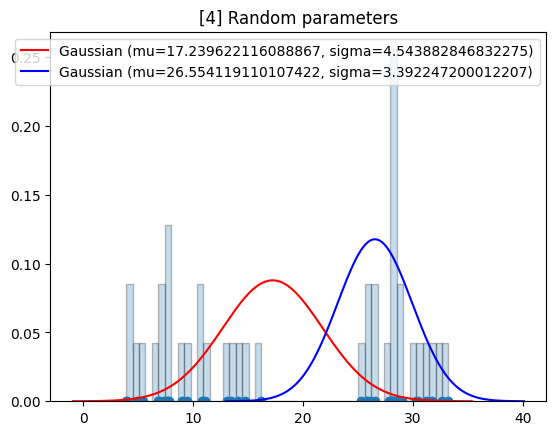

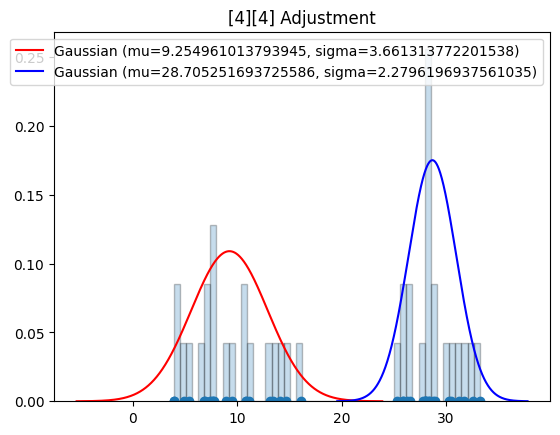

In [10]:
i_max = 5
i_adj_max = 5

mu1 = 10.0
sigma1 = 3.6
mu2 = 30.0
sigma2 = 2.6

for i in range(i_max):
    X = generate_data(n, mu1, sigma1, mu2, sigma2)
    P = random_parameters_heuristic(X)
    plot(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}] Random parameters'.format(i))

    for a in range(i_adj_max):
        M = calculate_membership_dataset(X, P)

        #print('[', i,'] Old P parameters: ', P)
        P = recalculate_parameters(X, M)
        #print('[', i,'] New P parameters: ', P, '\n')
    plot(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}][{}] Adjustment'.format(i, a))

#Algoritmo de Maximización de la Esperanza con datos artificiales (modelo Gamma)

In [66]:
# Util funcitons

def gamma_distribution_density_data(alpha, beta):
    """
        Given an alpha and a beta, this function returns a tuple representing the X and Y of the PDF

        params: alpha, beta <numbers>
        return: X, Y of the gamma distribution()
    """
    data = torch.linspace(alpha - 4*beta, alpha + 4*beta, 1000)

    # Non Log
    gamma_distribution = (1/((beta**alpha)*gamma(alpha)) * (data**(alpha-1)) * torch.exp(-1 * data/beta))

    # Log
    #gamma_distribution = -1*(alpha*torch.log(torch.tensor(beta))) -1*torch.log(torch.tensor(gamma(alpha))) * ((alpha - 1) * torch.log(data) - (data/beta) )

    return data, gamma_distribution

def plot_gamma(X, alpha1, beta1, alpha2, beta2, title=''):
    # a) Scatter Plot with histograms
    # Histograms
    plt.hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
    # Scatter
    plt.scatter(X,torch.zeros(len(X)))
    # Density
    x1, gamma_density_1 = gamma_distribution_density_data(alpha1, beta1)
    #print('DEBUG: gamma_density_1', gamma_density_1)
    x2, gamma_density_2 = gamma_distribution_density_data(alpha2, beta2)
    plt.plot(x1, gamma_density_1, label=f'Gamma (alpha={alpha1}, beta={beta1})', color='red')
    plt.plot(x2, gamma_density_2, label=f'Gamma (alpha={alpha2}, beta={beta2})', color='blue')
    plt.ylim(0, 2)
    plt.xlim(0,5)
    #plt.plot.ylim = (0, 0.3)
    if len(title):
        plt.title(title)
    plt.legend()
    plt.show()

X =  tensor([0.3869, 0.7137, 2.3441, 0.1622, 1.2460, 0.2787, 0.6807, 2.5095, 0.9236,
        1.2517, 0.9316, 0.3427, 1.4665, 3.1439, 1.2142, 1.0461, 0.5669, 0.8872,
        0.6201, 1.9330, 1.3055, 0.7460, 0.0990, 2.2998, 2.8284, 1.1806, 1.7652,
        1.0863, 0.4770, 1.4066, 0.0968, 0.1683, 1.8280, 1.3481, 0.8647, 0.2167,
        6.1456, 1.3887, 2.0758, 0.3911])


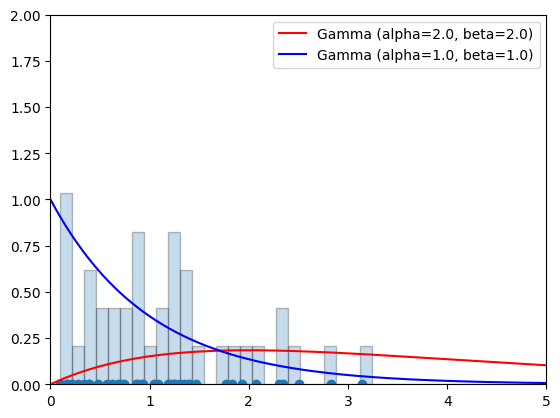

In [67]:
# 2)
alpha1 = 2.0
beta1 = 2.0
alpha2 = 1.0
beta2 = 1.0
# Generates data that follows two gamma distributions based on a set of parameters.
# parameters:
#    * alpha: concentration
#    * beta:  rates
def generate_gamma_data(n, alpha1, beta1, alpha2, beta2):

  # Generate distributions
  gamma_dist1 = torch.distributions.Gamma(torch.tensor([alpha1]), torch.tensor([beta1]))
  gamma_dist2 = torch.distributions.Gamma(torch.tensor([alpha2]), torch.tensor([beta2]))

  # Take a sample from each dist
  gamma_sample1 = gamma_dist1.sample((n,1)).squeeze()
  gamma_sample2 = gamma_dist2.sample((n,1)).squeeze()

  # Concatenate the 2 samples
  X =  torch.cat((gamma_sample1, gamma_sample2))
  return X

X = generate_gamma_data(n, alpha1, beta1, alpha2, beta2)
print('X = ', X)

plot_gamma(X, alpha1, beta1, alpha2, beta2)


In [65]:
def calculate_likelyhood_gamma_distribution_observation(x_n, alpha_k, beta_k):
    """
        Given an alpha, a beta, and an x observation this function returns the
        likelyhood that said x belongs to the gamma distribution that results
        from that alpha and beta.

        params: alpha, beta, x <numbers>
        return: likelyhood
    """
    # Non logarithmic gamma distribution.
    if x_n > 0:
      a = 1/((beta_k**alpha_k)*gamma(alpha_k))
      b = x_n**(alpha_k-1)
      c = torch.exp(-1 * x_n/beta_k)
      likelyhood = a * b * c
    else:
      likelyhood = 0

    return likelyhood

def calculate_log_likelyhood_gamma_distribution_observation(x_n, alpha_k, beta_k):
    """
        Given an alpha, a beta, and an x observation this function returns the
        logarithmic likelyhood that said x belongs to the gamma distribution
        that results from that alpha and beta.

        params: alpha, beta, x <numbers>
        return: likelyhood
    """
    # logarithmic gamma distribution.
    if x_n > 0:
      a = -1*(alpha_k*torch.log(beta_k))
      b = -1*torch.log(gamma(alpha_k))
      c = torch.sum( (alpha_k - 1) * torch.log(x_n) - (x_n/beta_k) )
      likelyhood = a + b + c
    else:
      likelyhood = 0

    return likelyhood